In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, data
from tqdm import tqdm

%matplotlib inline

In [56]:
def svd(A, iterations=100):   
    m, n = A.shape
    if m < n:
        v, _ = power_iteration(np.dot(A.T, A), iterations)
        u, s = power_iteration(np.dot(A, A.T), iterations)  
    else:  
        v, s = power_iteration(np.dot(A.T, A), iterations)
        u, _ = power_iteration(np.dot(A, A.T), iterations)
    return u, np.sqrt(s), v
    
def power_iteration(A, iterations=1000):
    n_lambdas = min(A.shape)
    eig_vals = []
    eig_vecs = []
    for i in tqdm(range(n_lambdas)):
        vecs = np.eye(A.shape[0], A.shape[1])
        for j in eig_vecs:
            vecs -= np.dot(j,j.T)
        A = np.dot(A, vecs)
        
        x_k = np.random.rand(A.shape[0]).reshape(A.shape[0],1)
        for _ in range(iterations):
            x_k1 = np.dot(A, x_k)

            x_k1_norm = np.linalg.norm(x_k1)
            
            x_k = x_k1 / x_k1_norm
            
        eig_vecs.append(x_k)
        eig_vals.append(np.dot(x_k.T, np.dot(A, x_k))[0])

    return np.squeeze(np.array(eig_vecs), axis=2), np.squeeze(np.array(eig_vals), axis=1)


def generate_matrix(s_values):
    s = np.diag(s_values)
    q, _ = np.linalg.qr(np.random.randn(s.shape[0], s.shape[1]))
    return np.dot(np.dot(q,s),q.T)

def reduce_image(img, u, s, v, dim):
    A = np.zeros(img.shape)
    for i in range(dim):
        u_ = u[:,i]
        v_ = v[i,:]
        u_ = np.expand_dims(u_, axis=1)
        v_ = np.expand_dims(v_, axis=1)
        A += s[i]*np.dot(u_, v_.T)
    return A.astype(np.uint8)

In [57]:
A = generate_matrix([1.5,2,3,3.5,4.5,5])
#u,s,v = np.linalg.svd(A)
u, s, v = svd(A)
print(u, '\n\n', s, '\n\n', v)


100%|██████████| 6/6 [00:00<00:00, 1435.67it/s]

(6, 6)
6
[[ 0.72883088  0.06253956 -0.19078984 -0.47262725 -0.24302021  0.38217567]
 [ 0.26323672  0.42189529  0.15722012  0.51984616  0.49273383  0.46364423]
 [-0.39769398  0.79067515 -0.21772671 -0.13206913 -0.37017839  0.12162688]
 [ 0.40811976  0.40119969  0.47069088 -0.00888554 -0.07444979 -0.6673121 ]
 [-0.18889169  0.14330997  0.10903708 -0.68281388  0.68211399 -0.0194629 ]
 [-0.19776164 -0.10689732  0.8111949  -0.15042421 -0.30049999  0.42249077]] 

 [ 5.   4.5  3.5  3.   2.   1.5] 

 [[ 0.72883088  0.06253956 -0.19078984 -0.47262725 -0.24302021  0.38217567]
 [ 0.26323672  0.42189529  0.15722012  0.51984616  0.49273383  0.46364423]
 [ 0.39769398 -0.79067515  0.21772671  0.13206913  0.37017839 -0.12162688]
 [ 0.40811976  0.40119969  0.47069088 -0.00888554 -0.07444979 -0.6673121 ]
 [ 0.18889169 -0.14330997 -0.10903708  0.68281388 -0.68211399  0.0194629 ]
 [ 0.19776164  0.10689732 -0.8111949   0.15042421  0.30049999 -0.42249077]]


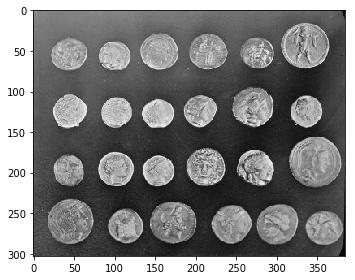

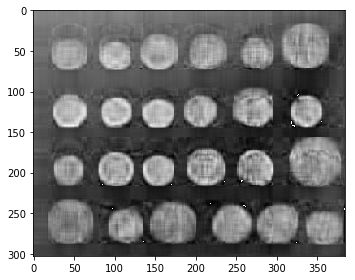

In [61]:
A = data.coins()
u,s,v = np.linalg.svd(A)
io.imshow(A)
io.show()
A_r = reduce_image(A, u, s, v, 17)
io.imshow(A_r)
io.show()